In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [24]:
from datetime import datetime, timedelta

In [25]:
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = yf.download("AAPL", start=start_date_str, end=end_date_str)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779846,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177734,77167900
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022552,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177048,98944600
2023-03-20,155.070007,157.820007,154.149994,157.399994,156.564285,73641400


**Closing Price**

In [26]:
df_filter = df[["Close"]]
df_filter.rename(columns={"Close": "Closing_t"}, inplace=True)
df_filter.head()

,Closing_t
Date,
2023-03-14,152.589996
2023-03-15,152.990005
2023-03-16,155.850006
2023-03-17,155.000000
2023-03-20,157.399994


<Axes: xlabel='Date'>

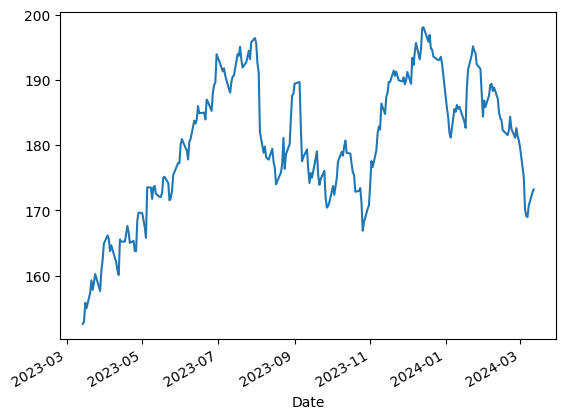

In [27]:
df_filter["Closing_t"].plot()

In [28]:
df_filter["Closing_t-1"] = df_filter["Closing_t"].shift(1)
df_filter

,Closing_t,Closing_t-1
Date,,
2023-03-14,152.589996,NaN
2023-03-15,152.990005,152.589996
2023-03-16,155.850006,152.990005
2023-03-17,155.000000,155.850006
2023-03-20,157.399994,155.000000
...,...,...
2024-03-06,169.119995,170.119995
2024-03-07,169.000000,169.119995
2024-03-08,170.729996,169.000000


**Returns**

In [29]:
df_filter["Returns"] = (df_filter["Closing_t"]/ df_filter["Closing_t-1"]) - 1
df_filter

,Closing_t,Closing_t-1,Returns
Date,,,
2023-03-14,152.589996,NaN,NaN
2023-03-15,152.990005,152.589996,0.002621
2023-03-16,155.850006,152.990005,0.018694
2023-03-17,155.000000,155.850006,-0.005454
2023-03-20,157.399994,155.000000,0.015484
...,...,...,...
2024-03-06,169.119995,170.119995,-0.005878
2024-03-07,169.000000,169.119995,-0.000710
2024-03-08,170.729996,169.000000,0.010237


<Axes: xlabel='Date'>

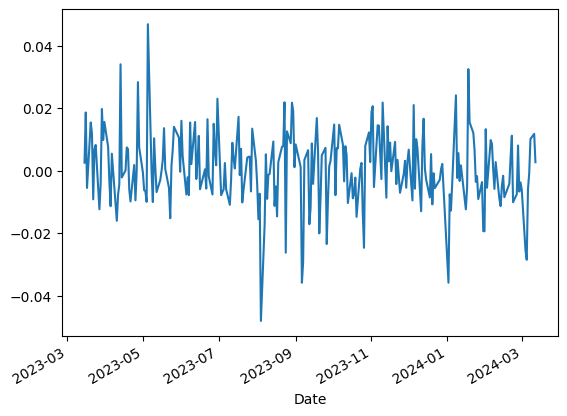

In [30]:
df_filter["Returns"].plot()